In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [5]:
from datetime import datetime

In [6]:
t1 = datetime (2009, 10, 20)

In [7]:
t1

datetime.datetime(2009, 10, 20, 0, 0)

In [13]:
# 快速生成时间
# start 开始时间  end结束时间  periods 时间间隔   freq='D' 天  'W' 周 ‘H’ 小时
# date_list_new = pd.date_range('2019-01-01', periods=100)
date_list_new = pd.date_range('2019-01-01', periods=100, freq='W-MON')

In [14]:
date_list_new

DatetimeIndex(['2019-01-07', '2019-01-14', '2019-01-21', '2019-01-28',
               '2019-02-04', '2019-02-11', '2019-02-18', '2019-02-25',
               '2019-03-04', '2019-03-11', '2019-03-18', '2019-03-25',
               '2019-04-01', '2019-04-08', '2019-04-15', '2019-04-22',
               '2019-04-29', '2019-05-06', '2019-05-13', '2019-05-20',
               '2019-05-27', '2019-06-03', '2019-06-10', '2019-06-17',
               '2019-06-24', '2019-07-01', '2019-07-08', '2019-07-15',
               '2019-07-22', '2019-07-29', '2019-08-05', '2019-08-12',
               '2019-08-19', '2019-08-26', '2019-09-02', '2019-09-09',
               '2019-09-16', '2019-09-23', '2019-09-30', '2019-10-07',
               '2019-10-14', '2019-10-21', '2019-10-28', '2019-11-04',
               '2019-11-11', '2019-11-18', '2019-11-25', '2019-12-02',
               '2019-12-09', '2019-12-16', '2019-12-23', '2019-12-30',
               '2020-01-06', '2020-01-13', '2020-01-20', '2020-01-27',
      

In [16]:
s2 = Series(np.random.rand(100), index=date_list_new)

In [17]:
s2

2019-01-07    0.970896
2019-01-14    0.561830
2019-01-21    0.635545
2019-01-28    0.576517
2019-02-04    0.466554
                ...   
2020-11-02    0.098717
2020-11-09    0.980694
2020-11-16    0.335518
2020-11-23    0.781852
2020-11-30    0.944636
Freq: W-MON, Length: 100, dtype: float64

### 时间序列采样和画图

In [20]:
t_range = pd.date_range('2019-01-01', '2019-12-31')

In [21]:
t_range

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [22]:
s1 = Series(np.random.randn(len(t_range)), index=t_range)

In [23]:
s1

2019-01-01    0.351100
2019-01-02   -0.458450
2019-01-03   -1.009095
2019-01-04    0.020632
2019-01-05    0.426496
                ...   
2019-12-27    1.721942
2019-12-28   -0.491451
2019-12-29    0.276259
2019-12-30    1.807699
2019-12-31    1.097214
Freq: D, Length: 365, dtype: float64

In [25]:
# 获取每月数据的平均值
s1_month = s1.resample('M').mean()

In [26]:
s1_month

2019-01-31   -0.215347
2019-02-28    0.052041
2019-03-31    0.198292
2019-04-30   -0.094432
2019-05-31   -0.060600
2019-06-30   -0.482046
2019-07-31    0.220430
2019-08-31   -0.046001
2019-09-30   -0.215451
2019-10-31   -0.133965
2019-11-30   -0.064975
2019-12-31    0.103810
Freq: M, dtype: float64

In [27]:
# 获取每小时数据的平均值
# ffill 向前填充数据
# bfill 向后填充数据
s1_hour = s1.resample('H').bfill()

In [28]:
s1_hour

2019-01-01 00:00:00    0.351100
2019-01-01 01:00:00   -0.458450
2019-01-01 02:00:00   -0.458450
2019-01-01 03:00:00   -0.458450
2019-01-01 04:00:00   -0.458450
                         ...   
2019-12-30 20:00:00    1.097214
2019-12-30 21:00:00    1.097214
2019-12-30 22:00:00    1.097214
2019-12-30 23:00:00    1.097214
2019-12-31 00:00:00    1.097214
Freq: H, Length: 8737, dtype: float64

In [29]:
h_range = pd.date_range('2019-01-01', '2019-12-31', freq='H')

In [30]:
h_range

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 01:00:00',
               '2019-01-01 02:00:00', '2019-01-01 03:00:00',
               '2019-01-01 04:00:00', '2019-01-01 05:00:00',
               '2019-01-01 06:00:00', '2019-01-01 07:00:00',
               '2019-01-01 08:00:00', '2019-01-01 09:00:00',
               ...
               '2019-12-30 15:00:00', '2019-12-30 16:00:00',
               '2019-12-30 17:00:00', '2019-12-30 18:00:00',
               '2019-12-30 19:00:00', '2019-12-30 20:00:00',
               '2019-12-30 21:00:00', '2019-12-30 22:00:00',
               '2019-12-30 23:00:00', '2019-12-31 00:00:00'],
              dtype='datetime64[ns]', length=8737, freq='H')

In [35]:
stock_df = DataFrame(index=h_range)
stock_df['BABA'] = np.random.randint(80, 160, size=len(h_range))
stock_df['TENCENT'] = np.random.randint(60, 140, size=len(h_range))

In [37]:
stock_df.head()

,BABA,TENCENT
2019-01-01 00:00:00,80,109
2019-01-01 01:00:00,145,120
2019-01-01 02:00:00,116,60
2019-01-01 03:00:00,133,111
2019-01-01 04:00:00,143,101


In [38]:
# 画图

import matplotlib.pyplot as plt

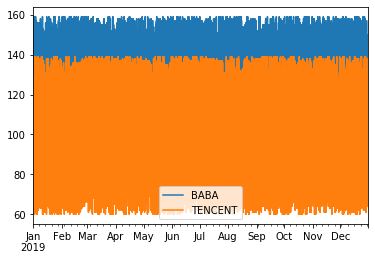

In [41]:
stock_df.plot()
plt.show()

In [42]:
# 重新采样按照每周一个点
weekly_df = DataFrame()

In [43]:
weekly_df['BABA'] = stock_df['BABA'].resample('W').mean()

In [44]:
weekly_df['TENCENT'] = stock_df['TENCENT'].resample('W').mean()

In [45]:
weekly_df.head()

,BABA,TENCENT
2019-01-06,121.305556,96.027778
2019-01-13,117.238095,101.113095
2019-01-20,121.994048,99.113095
2019-01-27,118.851190,98.547619
2019-02-03,116.285714,96.910714


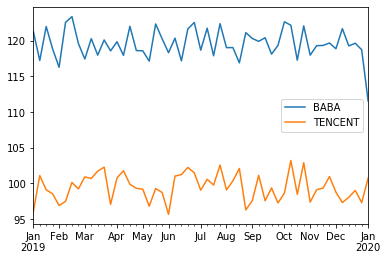

In [46]:
weekly_df.plot()